In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
from pandas import read_hdf
root_file='data/fea_sample/'
df_final_train = read_hdf(root_file+'storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf(root_file+'storage_sample_stage4.h5', 'test_df',mode='r')
df_final_test.shape,df_final_train.shape

((50002, 54), (100002, 54))

In [3]:
from pandas import read_hdf
root_file='data/fea_sample/'
df_train_1 = read_hdf('storage_sample_stage1.h5', 'train_df',mode='r')
df_test_1 = read_hdf('storage_sample_stage1.h5', 'test_df',mode='r')
df_test_1.shape,df_train_1.shape

((50002, 13), (100002, 13))

In [4]:
df_final_train.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,273084,1505602,1,0,0.000000,0.000000,0.000000,6,15,8,...,1.983691e-06,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14
1,832016,1543415,1,0,0.187135,0.028382,0.343828,94,61,142,...,-6.236048e-11,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09
2,1325247,760242,1,0,0.369565,0.156957,0.566038,28,41,22,...,-2.380564e-19,-7.021227e-19,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,11,5,7,...,6.058498e-11,1.514614e-11,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13
4,140165,1708748,1,0,0.000000,0.000000,0.000000,1,11,3,...,1.197283e-07,1.999809e-14,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [5]:
df_train_1.head(5)

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,num_followers_d
0,273084,1505602,1,0,0.000000,0.000000,0.000000,11,6,8,0,0,15
1,832016,1543415,1,0,0.187135,0.028382,0.343828,17,94,142,11,32,61
2,1325247,760242,1,0,0.369565,0.156957,0.566038,35,28,22,26,17,41
3,1368400,1006992,1,0,0.000000,0.000000,0.000000,2,11,7,0,0,5
4,140165,1708748,1,0,0.000000,0.000000,0.000000,5,1,3,0,0,11


In [6]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [7]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [13]:
df_final_train.columns

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferetial_attachment_followees', 'preferetial_attachment_followers'],
      dtype='object')

In [9]:
df_final_train['num_followers_s']

0          6
1         94
2         28
3         11
4          1
          ..
99997      7
99998      0
99999      0
100000     1
100001     1
Name: num_followers_s, Length: 100002, dtype: int64

### 1. preferential attachment

In [10]:
# preferential attachment
def pre(df):
    n_fer_s=df['num_followers_s']
    n_fee_s=df['num_followees_s']
    n_fer_d=df['num_followers_d']
    n_fee_d=df['num_followees_d']
    
    pre_fer=n_fer_s*n_fer_d
    pre_fee=n_fee_s*n_fee_d

    return pre_fee,pre_fer
  

fee,fer=pre(df_train_1)
df_final_train['preferetial_attachment_followees']=fee
df_final_train['preferetial_attachment_followers']=fer

fee,fer=pre(df_test_1)
df_final_test['preferetial_attachment_followees']=fee
df_final_test['preferetial_attachment_followers']=fer

### 2. SVD dot product

Add feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features

In [11]:
if os.path.isfile('data/after_eda/train_pos_after_eda.csv'):
     train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

In [12]:
def svd(x, S):
    try:
        z = sadj_dict[x]
        return S[z]
    except:
        return [0,0,0,0,0,0]

In [14]:
#for svd features to get feature vector creating a dict node val and inedx in svd vector
sadj_col = sorted(train_graph.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}

In [15]:
Adj = nx.adjacency_matrix(train_graph,nodelist=sorted(train_graph.nodes())).asfptype()

In [16]:
U, s, V = svds(Adj, k = 6)
print('Adjacency matrix Shape',Adj.shape)
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

Adjacency matrix Shape (1780722, 1780722)
U Shape (1780722, 6)
V Shape (6, 1780722)
s Shape (6,)


In [18]:
def svd_dot(df):
    v_dot=[]
    u_dot=[]
    destination=df['destination_node']
    source=df['source_node']

    for i in range(len(source)):
        temp=svd(source[i],U)
        temp1=svd(destination[i],U)
        u_dot.append(np.dot(temp,temp1))
        temp=svd(source[i],V.T)
        temp1=svd(destination[i],V.T)
        v_dot.append(np.dot(temp,temp1))
        
    u_dot=np.array(u_dot)
    v_dot=np.array(v_dot)
    
    print(u_dot.shape,v_dot.shape)
    return u_dot,v_dot
    
        
u_dot,v_dot=svd_dot(df_train_1)
df_final_train['u_dot']=u_dot
df_final_train['v_dot']=v_dot

u_dot,v_dot=svd_dot(df_test_1)
df_final_test['u_dot']=u_dot
df_final_test['v_dot']=v_dot

(100002,) (100002,)
(50002,) (50002,)


In [19]:
df_final_train.columns

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferetial_attachment_followees', 'preferetial_attachment_followers',
       'u_dot', 'v_dot'],
      dtype='object')

In [20]:
df_final_test.columns

Index(['jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferetial_attachment_followees', 'preferetial_attachment_followers',
       'u_dot', 'v_dot'],
      dtype='object')

### Xgboost

Estimators =  10 Train Score 0.9699225881465011 test Score 0.9310183809483381
Estimators =  50 Train Score 0.9843539195747165 test Score 0.9291178402661524
Estimators =  100 Train Score 0.9936073425382257 test Score 0.9239220696263174
Estimators =  150 Train Score 0.9985802555540002 test Score 0.9189200762198385
Estimators =  200 Train Score 0.9998801055071537 test Score 0.9150307143777653


Text(0.5, 1.0, 'Estimators vs score')

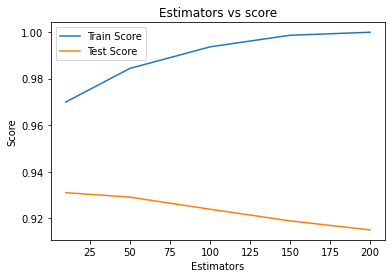

In [22]:
from xgboost import XGBClassifier 

n_estimators = [10,50,100,150,200]
train_scores = []
test_scores = []
for i in n_estimators:
    clf = XGBClassifier(n_estimators=i, n_jobs=-1)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(n_estimators,train_scores,label='Train Score')
plt.plot(n_estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.legend()
plt.title('Estimators vs score')


depth =  3 Train Score 0.9751826886095424 test Score 0.9236927269630386
depth =  9 Train Score 0.9952123397435898 test Score 0.9267081272684821
depth =  11 Train Score 0.9993202311214188 test Score 0.9264690278632515
depth =  15 Train Score 1.0 test Score 0.9284821787839641
depth =  20 Train Score 1.0 test Score 0.9295363116663138
depth =  35 Train Score 1.0 test Score 0.9292574571609901
depth =  50 Train Score 1.0 test Score 0.9294988369634172
depth =  70 Train Score 1.0 test Score 0.9294988369634172
depth =  130 Train Score 1.0 test Score 0.9294988369634172


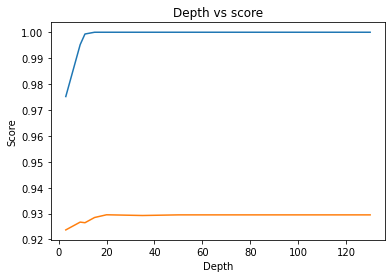

In [23]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = XGBClassifier(n_estimators=50,max_depth=i, n_jobs=-1)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score')
plt.show()

In [24]:
from sklearn.metrics import f1_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from xgboost import XGBClassifier 
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
            }

clf = XGBClassifier(n_jobs=-1)

xg_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)
xg_random.fit(df_final_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None...
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,

In [25]:
print(xg_random.best_params_)

{'max_depth': 10, 'n_estimators': 109}


In [26]:
clf_best = XGBClassifier(n_jobs=-1,max_depth=10,n_estimators=109)
clf_best.fit(df_final_train,y_train)
y_train_pred = clf_best.predict(df_final_train)
y_test_pred = clf_best.predict(df_final_test)

In [27]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 1.0
Test f1 score 0.925744151953598


In [28]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


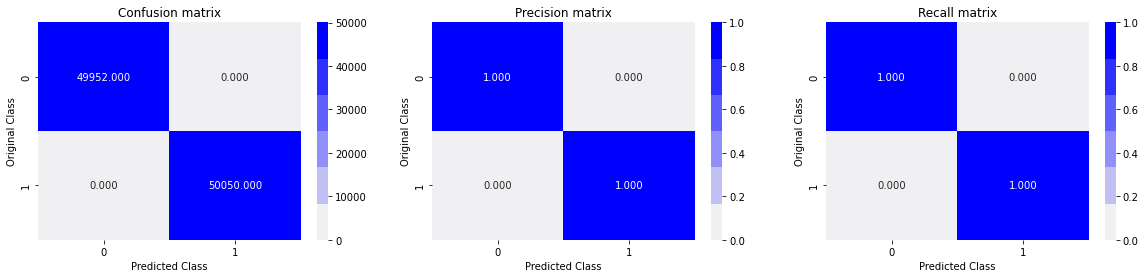

Test confusion_matrix


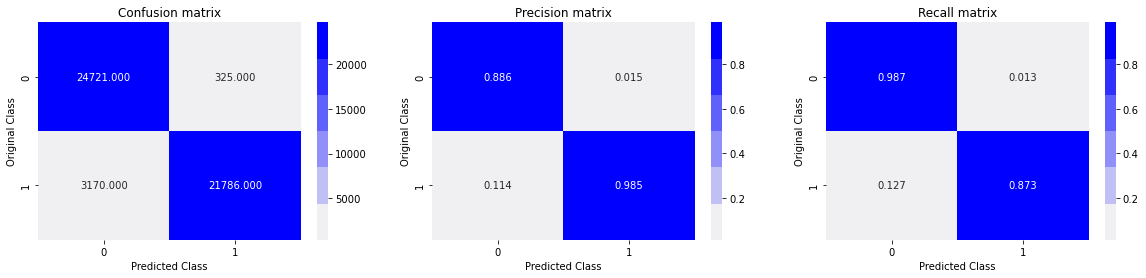

In [29]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

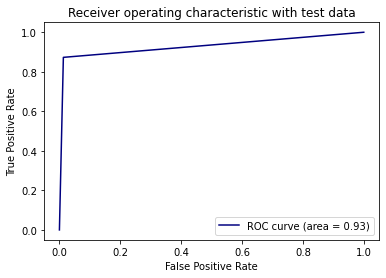

In [32]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

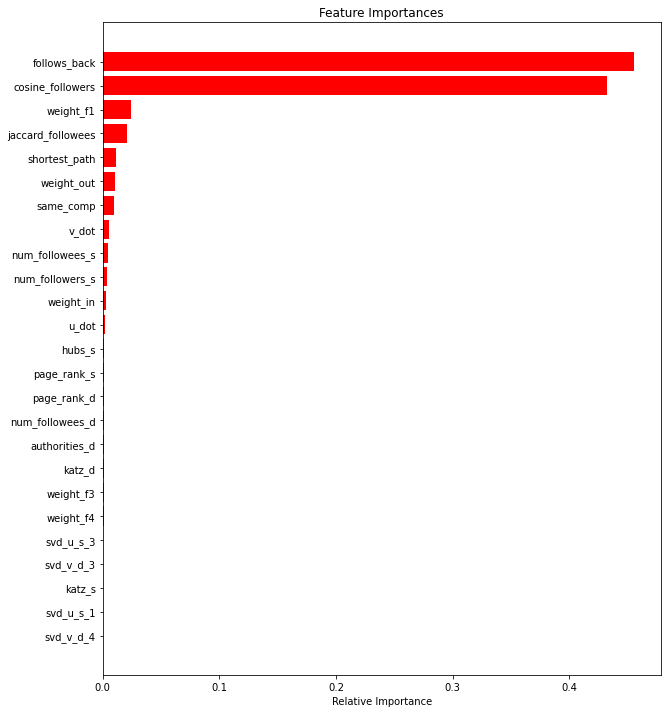

In [31]:
features = df_final_train.columns
importances = clf_best.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### For XGBClassifier the important features are follows_back and cosine_follwers more then 80% of  importance are given to these feature for classification in XGBoost.

### Randomforest

Estimators =  10 Train Score 0.9244254074383619 test Score 0.9196767761569945
Estimators =  50 Train Score 0.9208723393127974 test Score 0.9149906479204758
Estimators =  100 Train Score 0.9222460172368764 test Score 0.9147352038026333
Estimators =  250 Train Score 0.9224333566894302 test Score 0.914778947368421
Estimators =  450 Train Score 0.9225623013881921 test Score 0.9149567523202222


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

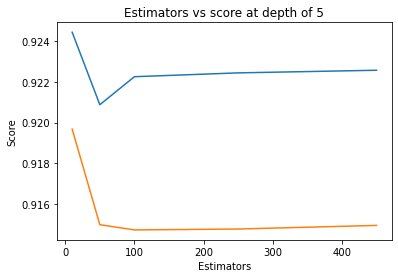

In [69]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8886100981319838 test Score 0.8638968481375358
depth =  9 Train Score 0.9546560857382447 test Score 0.9243729334709264
depth =  11 Train Score 0.9612263117315263 test Score 0.9255976137461666
depth =  15 Train Score 0.9634251509156393 test Score 0.9261829652996846
depth =  20 Train Score 0.9631597627135833 test Score 0.9258877699051784
depth =  35 Train Score 0.9629982660190434 test Score 0.9257842065427635
depth =  50 Train Score 0.9629982660190434 test Score 0.9257842065427635
depth =  70 Train Score 0.9629982660190434 test Score 0.9257842065427635
depth =  130 Train Score 0.9629982660190434 test Score 0.9257842065427635


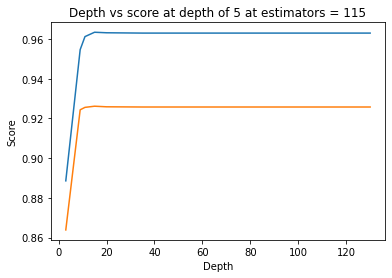

In [70]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [51]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
#print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.9623518  0.96197234 0.9609505  0.96210778 0.96284202]


In [71]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [72]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [73]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [74]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9634326995271818
Test f1 score 0.9263613991544497


Train confusion_matrix


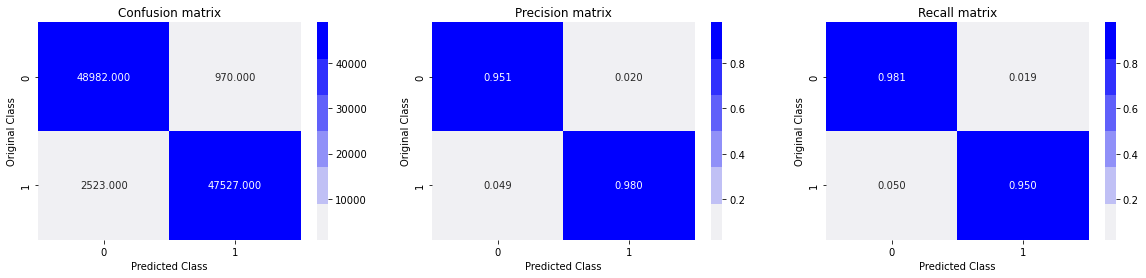

Test confusion_matrix


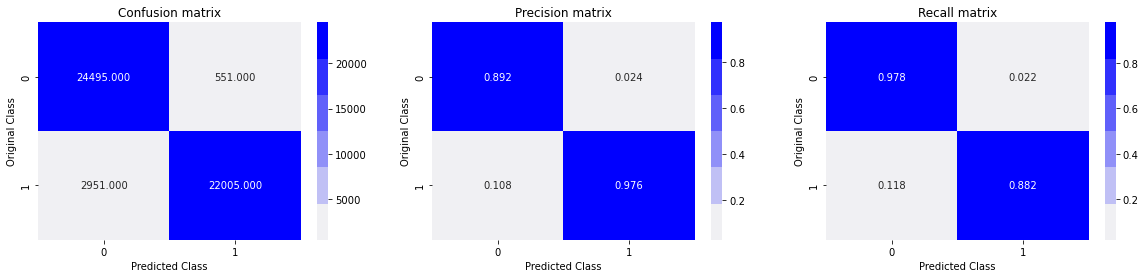

In [57]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

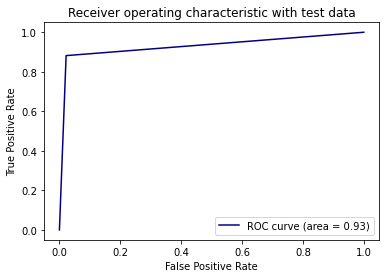

In [58]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

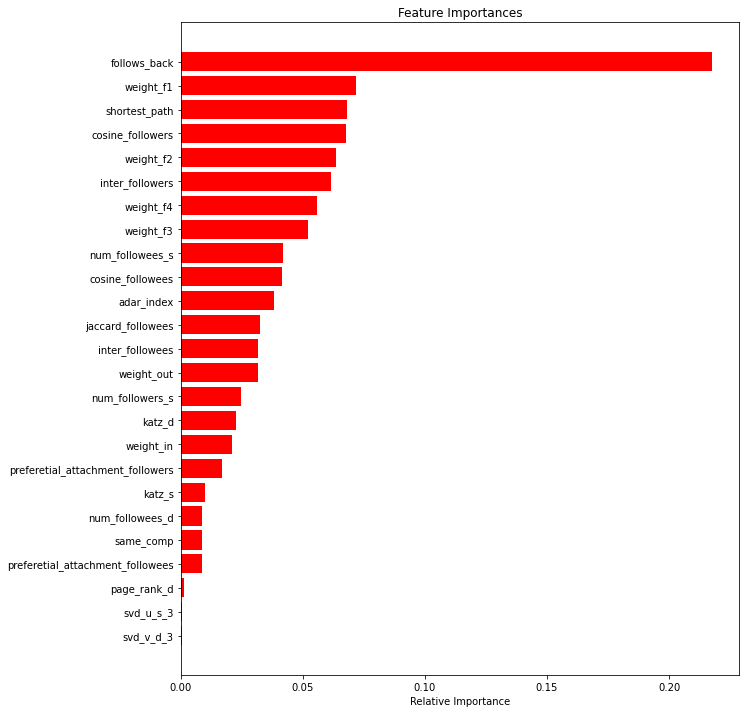

In [59]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Observed points
### 1. Still follow back is important feature out there among all the features.
### 2. Preferetial attachment for followees and followers turns out to be good features.
### 3. SVD dot product is not useful for predicting the outputs.
### 4. Adding few new useful features helps to improve the model to predict the outputs.